In [1]:
import sys
import time
import numpy as np
import os.path as osp
import tensorflow as tf
import matplotlib.pyplot as plt

import tf_lab.point_clouds.in_out as pio
from tf_lab.point_clouds.in_out import PointCloudDataSet
from tf_lab.point_clouds.vae import VariationalAutoencoder
from tf_lab.point_clouds.autoencoder import Configuration as Conf
import tf_lab.models.point_net_based_AE as pnAE
from tf_lab.fundamentals.utils import set_visible_GPUs

from general_tools.in_out.basics import create_dir, delete_files_in_directory
from geo_tool import Point_Cloud

from general_tools.in_out.basics import files_in_subdirs
from tf_lab.autopredictors.scripts.helper import shape_net_category_to_synth_id

/orions4-zfs/projects/lins2/Panos_Space/Git_Repos/geo_tool/solids/mesh.py:26: UserWarning: Mayavi library was not found. Some graphics utilities will be disabled.
  warnings.warn('Mayavi library was not found. Some graphics utilities will be disabled.')


In [2]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

In [3]:
class_type = raw_input('Give me the class type.\n').lower()
class_syn_id = shape_net_category_to_synth_id()[class_type]
experiment_name = 'bernoulli_1.0_full_shapes_' + class_syn_id + '_vae'

seed = 42
np.random.seed(seed)
tf.set_random_seed(seed)

top_data_dir = '/orions4-zfs/projects/lins2/Panos_Space/DATA/'
full_pclouds_path = osp.join(top_data_dir, 'ShapeNetPointClouds/from_manifold_meshes/1024/', class_syn_id)

train_dir = osp.join(top_data_dir, 'OUT/models/')
train_dir = osp.join(train_dir, experiment_name)
create_dir(train_dir)

Give me the class type.
chair


'/orions4-zfs/projects/lins2/Panos_Space/DATA/OUT/models/bernoulli_1.0_full_shapes_03001627_vae'

In [4]:
full_file_names = pio.load_filenames_of_input_data(full_pclouds_path)
full_pclouds, full_model_names, class_ids = pio.load_crude_point_clouds(file_names=full_file_names, n_threads=11)
print '%d files containing complete point clouds were found.' % (len(full_pclouds), )

6778 files containing complete point clouds were found.


In [5]:
train_data_, val_data_, test_data_ = pio.train_validate_test_split([full_pclouds, 
                                                                    full_model_names],
                                                                    train_perc=0.9,
                                                                    validate_perc=0.0,
                                                                    test_perc=0.1,                                                                   
                                                                    seed=seed)

train_data = PointCloudDataSet(train_data_[0], labels=train_data_[1])
test_data = PointCloudDataSet(test_data_[0], labels=test_data_[1])

In [31]:
def reset_graph():
    if 'sess' in globals() and sess:
        sess.close()
    tf.reset_default_graph()

set_visible_GPUs([0])

conf = Conf(n_input = [1024, 3],
            training_epochs = 1000,
            batch_size = 30,
            loss = 'chamfer',
            train_dir = train_dir,
            loss_display_step = 1,
            saver_step = None,
            learning_rate = 0.0002,
            saver_max_to_keep = 200,
            gauss_augment = {'mu': 0, 'sigma': 0.02},
            encoder = pnAE.encoder,
            decoder = pnAE.decoder,
            spatial_trans = True,
            denoising = False,
            n_z = 512,
            latent_vs_recon = 1.0,
            z_rotate = True
           )

reset_graph()
ae = VariationalAutoencoder(experiment_name, conf)
ae.train(train_data, conf)

NameError: global name 'nn_distance' is not defined

In [9]:
# test_data.next_batch(conf.batch_size)
# ae.reconstruct()
# test_data.next_batch(conf.batch_size)[0][0].shape
# Point_Cloud(points=test_data.next_batch(conf.batch_size)[0][0]).plot()
# Point_Cloud(points=ae.reconstruct(test_data.next_batch)
# )[0]).plot
# Point_Cloud(points=ae.generate()[0]).plot()

In [10]:
from general_tools.in_out.basics import unpickle_data
a = unpickle_data('/orions4-zfs/projects/lins2/Panos_Space/Git_Repos/tf_lab/notebooks/panos/test_degub.np')
b = a.next()
b.shape

(30, 1024, 3)

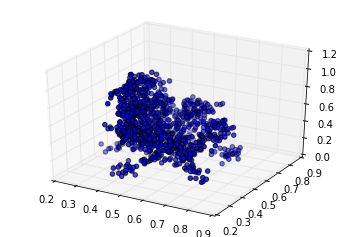

In [21]:
Point_Cloud(points=b[10,:,:]).plot();

1.8755714600
